# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [1]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

## 2. Create a Path to the File Using Pathlib.

In [2]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_csv_path = Path("../Resources/MSFT.csv")
sp500_csv_path = Path("../Resources/SP500.csv")

## 3. Read the CSVs into Pandas DataFrames.

In [4]:
# Read the data, set the `date` as a datetime index
msft_df = pd.read_csv(msft_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)
sp500_df = pd.read_csv(sp500_csv_path, index_col="date", infer_datetime_format=True, parse_dates=True)

msft_df.head()

,close,volume,open,high,low
date,,,,,
2009-08-03,23.83,46843710,23.82,23.86,23.50
2009-08-04,23.77,49116380,23.68,23.79,23.53
2009-08-05,23.81,53263040,23.84,24.25,23.79
2009-08-06,23.46,59655950,23.93,23.98,23.27
2009-08-07,23.56,46165010,23.75,23.82,23.50


## 4. Combine DataFrames and Sort the Index

In [8]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
df_comb = pd.concat([msft_df,sp500_df], join = 'inner', axis = 'columns')

# Sort datetime index in ascending order (past to present)
df_comb.sort_index()

# Display a few rows
df_comb

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.680,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.800,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.290,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.370,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.260,40.26,39.8100,1911.910034
...,...,...,...,...,...,...
2019-05-13,123.35,33944920,124.110,125.55,123.0400,2811.870117
2019-05-14,124.73,25266320,123.870,125.88,123.7000,2834.409912
2019-05-15,126.02,24722710,124.260,126.71,123.7000,2850.959961


## 5. Drop Extraneous Columns

In [10]:
# Drop extra columns and only leave the close columns and associated values
df2 = df_comb.drop(columns = ['volume','open','high','low']).copy()
df2

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 6. Rename Columns

In [12]:
# Rename the columns to match the corresponding stock
df2.columns = ['MSFT','SP500']
df2

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034
...,...,...
2019-05-13,123.35,2811.870117
2019-05-14,124.73,2834.409912
2019-05-15,126.02,2850.959961


## 7. Calculate Daily Returns

In [14]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = df2.pct_change()
daily_returns

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988
...,...,...
2019-05-13,-0.029733,-0.024131
2019-05-14,0.011188,0.008016
2019-05-15,0.010342,0.005839


## 8. Calculate Covariance of MSFT returns vs. S&P 500 returns

In [15]:
# Calculate covariance of all daily returns of MSFT vs. S&P 500
msft_cov = daily_returns["MSFT"].cov(daily_returns["SP500"])
msft_cov

9.084836971066263e-05

## 9. Calculate Variance of MSFT Returns

In [17]:
# Calculate variance of all daily returns of MSFT vs. AAPL
variance = daily_returns["MSFT"].var()
variance

0.00021456328327532686

## 10. Calculate Beta of MSFT

In [19]:
# Calculate beta of all daily returns of MSFT
msft_beta = msft_cov / variance
msft_beta

0.42341060559781946

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

<AxesSubplot:xlabel='date'>

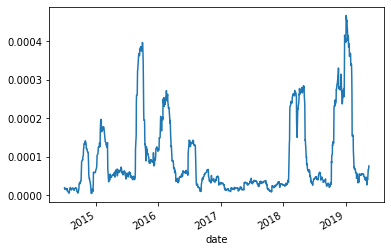

In [20]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_msft_covariance = daily_returns["MSFT"].rolling(window=30).cov(daily_returns["SP500"])

rolling_msft_covariance.plot()

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:xlabel='date'>

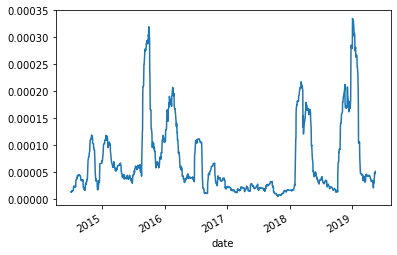

In [21]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_SP500_variance = daily_returns["SP500"].rolling(window=30).var()
rolling_SP500_variance.plot()

## 13. Calculate 30-Day Rolling Beta of MSFT

<AxesSubplot:xlabel='date'>

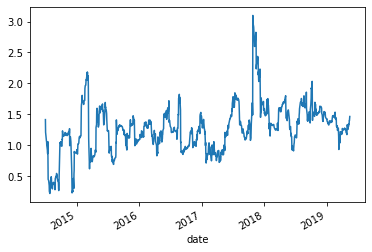

In [27]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_msft_beta = rolling_msft_covariance / rolling_SP500_variance
rolling_msft_beta.plot()

## 14. Beta vs. Correlation

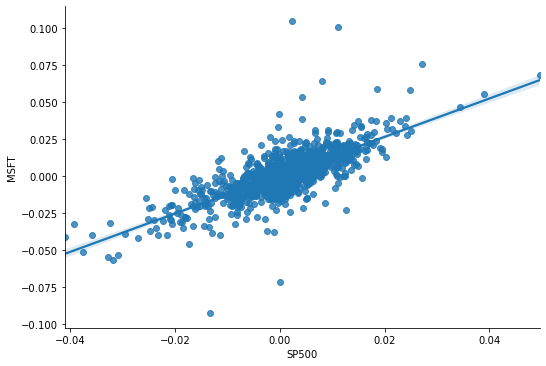

In [28]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
import seaborn as sns
sns.lmplot(x='SP500', y='MSFT', data=daily_returns, aspect=1.5, fit_reg=True)